In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 12500 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


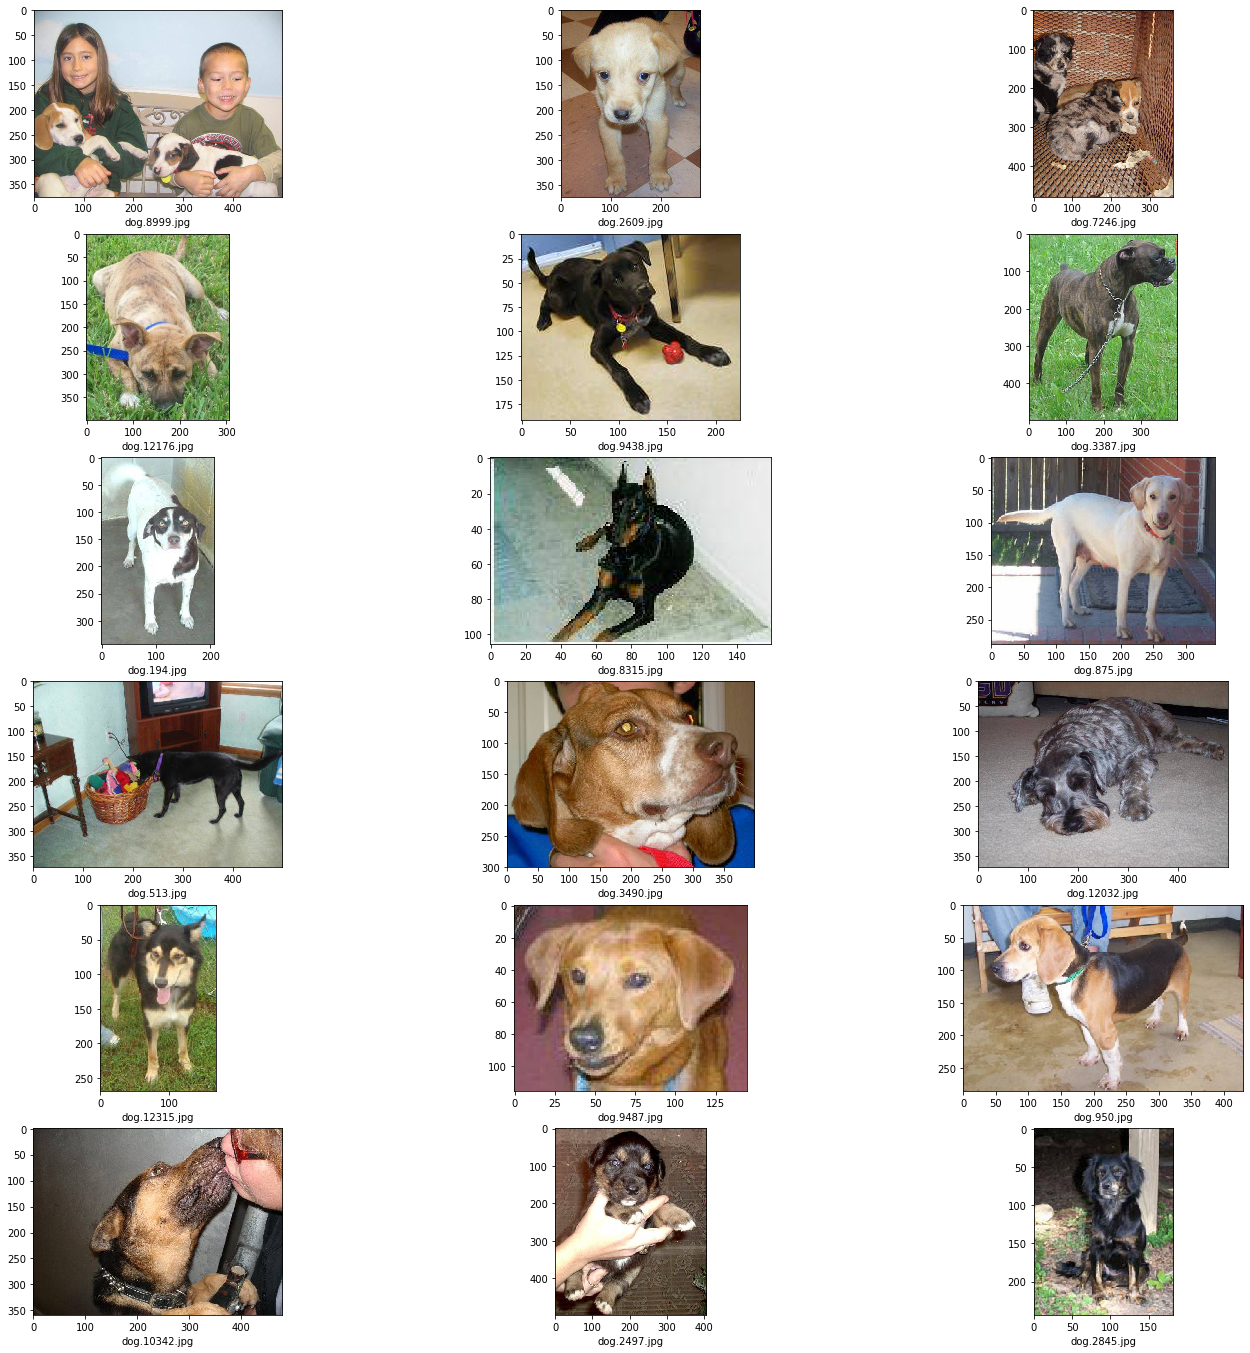

In [2]:
# define location of dataset
img_folder = 'train/'
check_arr = np.random.random_integers(1, 12500, size=18)
plt.figure(figsize=(24, 24))
for  idx,i in enumerate(check_arr):
    # define subplot
    plt.subplot(6, 3, idx+1)
    # define filename
    filename = 'dog.' + str(i) + '.jpg'
    filepath = img_folder + filename
    # load image pixels
    image = imread(filepath)
    # plot raw pixel data
    plt.xlabel(filename)
    plt.imshow(image)
# show the figure
plt.show()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 12500 + 1) instead
  


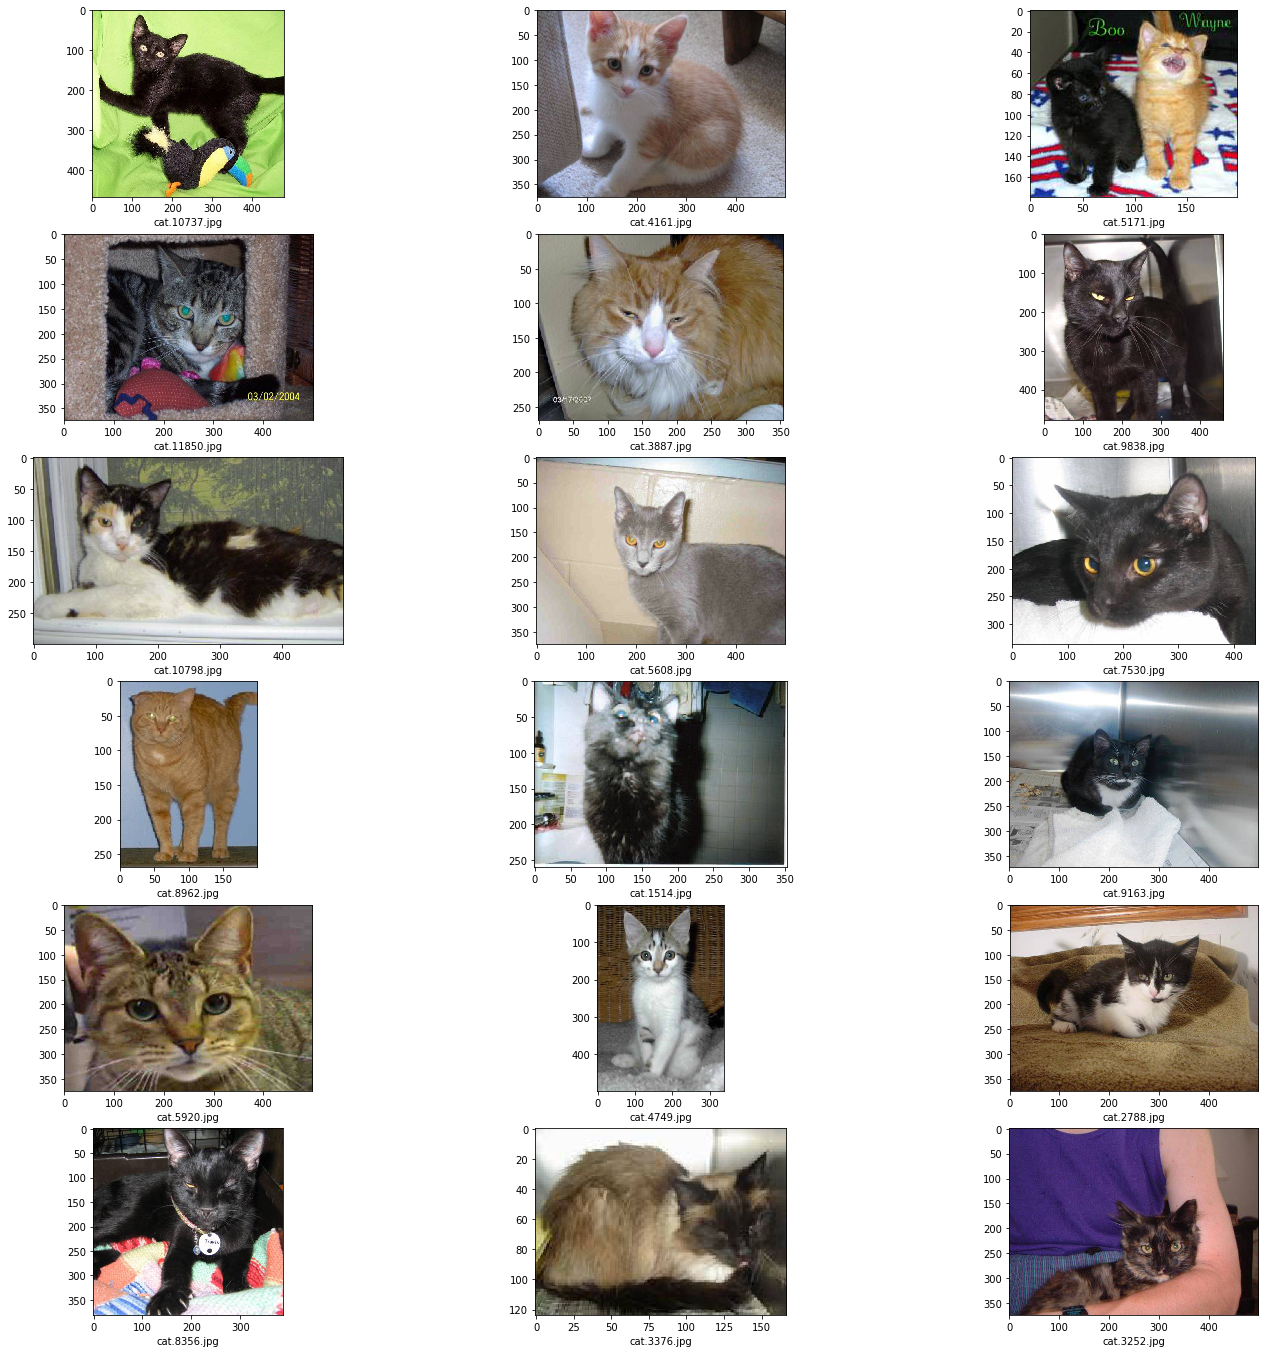

In [3]:
# plot first few images
check_arr = np.random.random_integers(1, 12500, size=18)
plt.figure(figsize=(24, 24))
for  idx,i in enumerate(check_arr):
    # define subplot
    plt.subplot(6, 3, idx+1)
    # define filename
    filename = 'cat.' + str(i) + '.jpg'
    filepath = img_folder + filename
    # load image pixels
    image = imread(filepath)
    # plot raw pixel data
    plt.xlabel(filename)
    plt.imshow(image)
# show the figure
plt.show()

In [4]:
import os
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        os.makedirs(newdir, exist_ok=True)

In [5]:
from os import listdir
from random import seed
from random import random
import shutil
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        shutil.copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        shutil.copyfile(src, dst)

In [6]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.show()
    #pyplot.savefig(filename + '_plot.png')
    #pyplot.close()
    return
 

Using TensorFlow backend.


Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
> 85.689


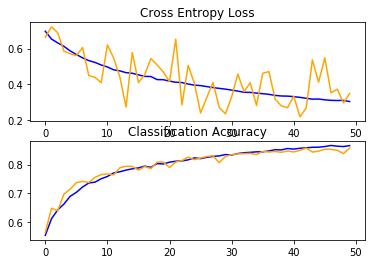

In [7]:
# define model
model = define_model()
# create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
    class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
    class_mode='binary', batch_size=64, target_size=(200, 200))
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)

In [8]:
model.save('final_model.h5')

In [9]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model


def load_image(filename):
    img = load_img(filename, target_size=(200, 200))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 200, 200, 3)
    return img



In [10]:
model = load_model('final_model.h5')
dir_arr = np.arange(1, 12501, 1)
label_arr = [0]*12500
for i in range(12500):
    img = load_image('test1/' +str(i+1)+'.jpg')
    result = model.predict(img)
    final_result = 1
    if result[0] < 0.5:
        final_result = 0
    label_arr[i] = final_result
    

In [11]:
import pandas as pd
df_out = pd.DataFrame({'id' : dir_arr, 'label' : label_arr})
df_out.head()

id  label
0   1      1
1   2      1
2   3      1
3   4      0
4   5      1

In [12]:
df_out.to_csv('output.csv', index=False)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 12500 + 1) instead
  after removing the cwd from sys.path.


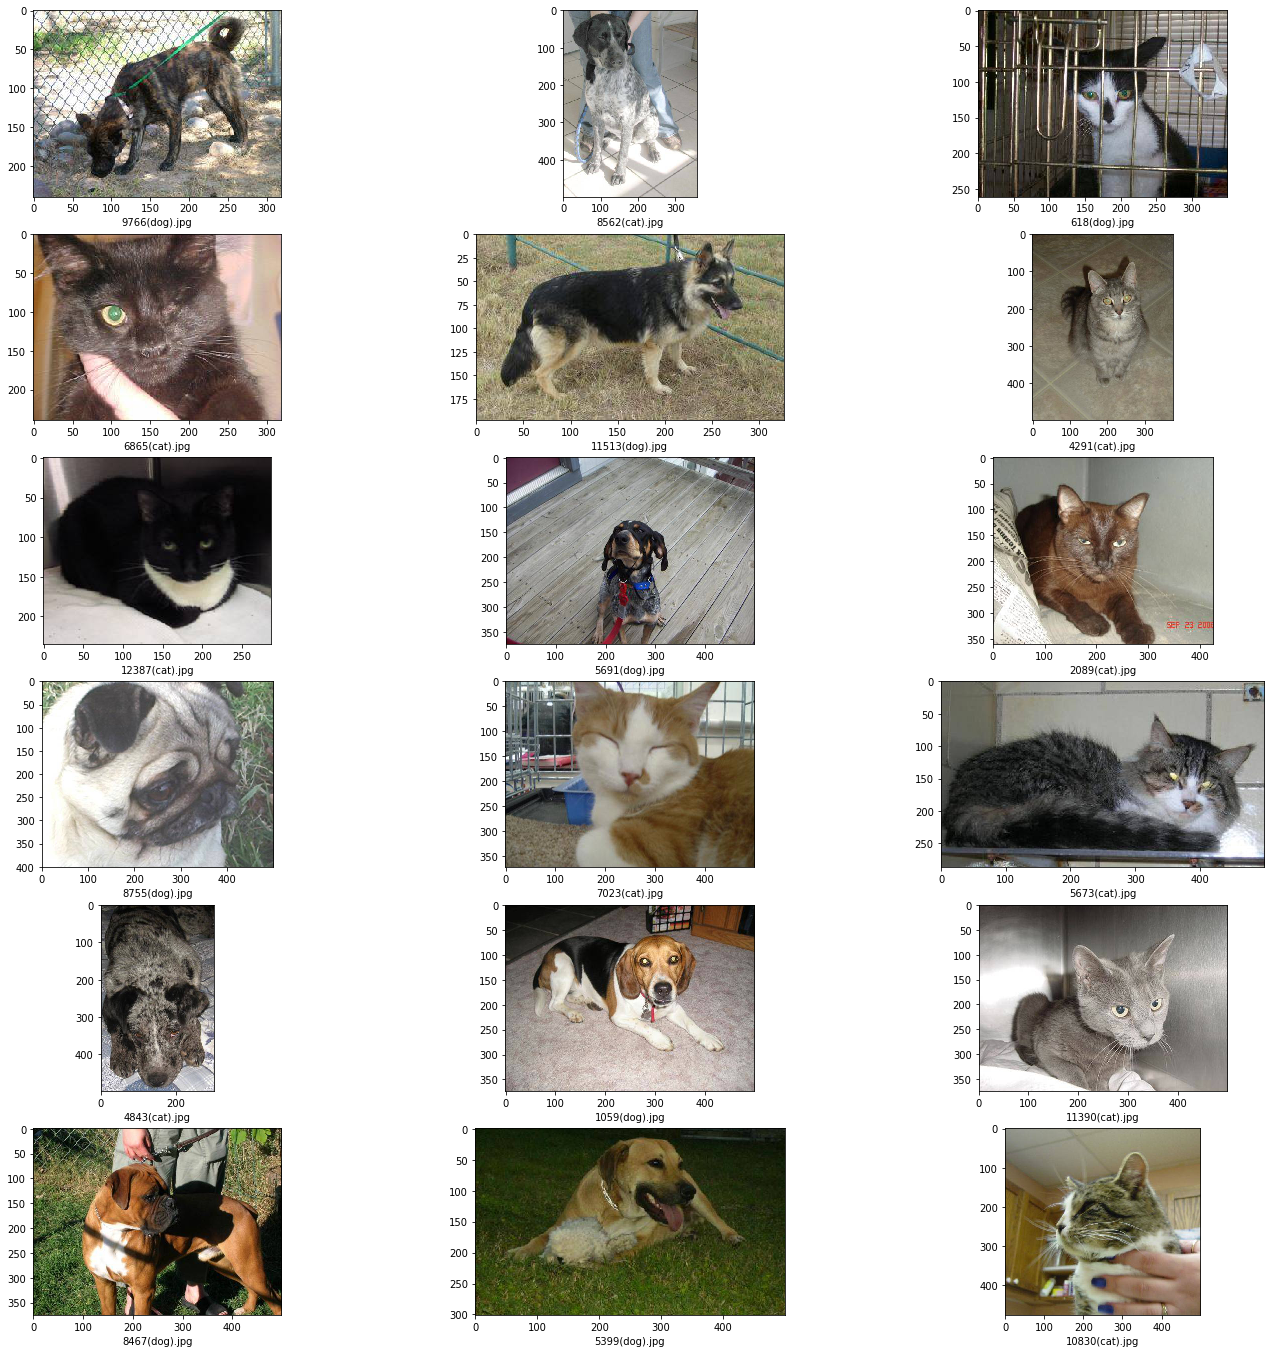

In [13]:
# define location of dataset
img_folder = 'test1/'
# plot first few images
check_arr = np.random.random_integers(1, 12500, size=18)
plt.figure(figsize=(24, 24))
for  idx,i in enumerate(check_arr):
    # define subplot
    plt.subplot(6, 3, idx+1)
    label = df_out[df_out.id == i]['label']
    lbl_str = 'dog'
    if label_arr[i-1] == 0:
        lbl_str = 'cat'
    
    # define filename
    filename = img_folder + str(i) + '.jpg'
    out_filename = str(i) + '('+ lbl_str + ').jpg'
    plt.xlabel(out_filename)
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()